Aleksa Kostic 52228237

Mandt

CS 178, Lec A (34340)

23 April 2021

# Problem 1: Linear Regression

## 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import mltools as ml

In [3]:
data = np.genfromtxt("data/curve80.txt", delimiter=None)

In [4]:
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it's 2-d
Y = data[:,1]
Xtr, Xte, Ytr, Yte = ml.splitData(X,Y,0.75) # split data set 75/25
print(np.shape(Xtr))
print(np.shape(Xte))
print(np.shape(Ytr))
print(np.shape(Yte))

(60, 1)
(20, 1)
(60,)
(20,)


## 2.

In [5]:
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200)  # densely sample possible x-values
xs = xs[:,np.newaxis]       # force "xs" to be an Mx1 matrix (expected by our code)
ys = lr.predict( xs )       # make predictions at xs

### (a)

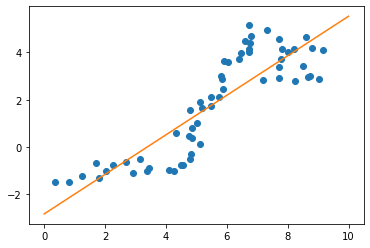

In [6]:
plt.plot(Xtr, Ytr, 'o')
plt.plot(xs, ys)

### (b)

In [7]:
print(lr.theta)

[[-2.82765049  0.83606916]]


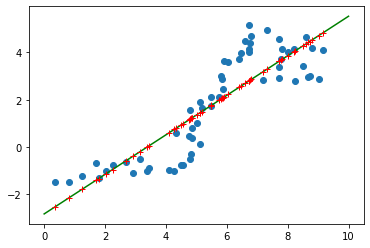

In [9]:
# (x,y) plot from training data
plt.plot(Xtr, Ytr, 'o')
# manually plotting linear regression coefficients using "xs"
plt.plot(xs, xs*0.83606916 - 2.82765049,'g')
# manually plotting y_hat points using "Xtr"
plt.plot(Xtr, Xtr*0.83606916 - 2.82765049,'r+')

The blue plots are the x-training versus y-training points, representing the given data.
The green diagonal line is the prediction line.
The red crosses are plotted x-training, y_hat(x-training), where y_hat is the formula y = mx + b using the theta parameter values.

### (c)

Mean Squared Error of predictions for the training data

In [10]:
y_hat_tr = Xtr*0.83606916 - 2.82765049
MSE_tr = np.mean((Ytr - y_hat_tr)**2)
MSE_tr

8.030381800325225

Mean Squared Error of predictions for the test data

In [11]:
y_hat_te = Xte*0.83606916 - 2.82765049
MSE_te = np.mean((Yte - y_hat_te)**2)
MSE_te

10.793486647914342

## 3.

In [12]:
Xtr2 = np.zeros( (Xtr.shape[0],2) ) # create Mx2 array to store features
Xtr2[:,0] = Xtr[:,0]        # place original "x" feature as X1
Xtr2[:,1] = Xtr[:,0]**2     # place "x^2" feature as X2
# Now, Xtr2 has two features about each data point: "x" and "x^2"

In [13]:
# Create polynomail features up to a "degree"; don't create constant feature
# (the linear regression learner will add teh constant feature automatically)

# XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)


In [14]:
# Rescale the data matrix so that the features have similar ranges/variance
# XtrP,params = ml.transforms.rescale(XtrP)

# Then we can train the model on the scaled feature matrix:
# lr = ml.linear.linearRegress(XtrP, Ytr)

# Now, apply the same polynomial expansion & scaling transformation to Xtest:
# XteP, = ml.transforms.rescale( ml.transforms.fpoly(Xte,degree,false), params)

_This is where the work starts_

In [69]:
# polynomial regression models of degree d = 1,3,5,7,10,18
d = [1,3,5,7,10,18]

prm = []

for i in d:
    Xtrp = ml.transforms.fpoly(Xtr, i, bias=False)
    Xtrp, params = ml.transforms.rescale(Xtrp)
    lr = ml.linear.linearRegress(Xtrp, Ytr)
    Xtep,_ = ml.transforms.rescale(ml.transforms.fpoly(Xte,i,bias=False),params)
    prm.append((Xtrp,params,lr,Xtep,_))

# prm contains a list of tuples whose values are
# prm[i][0] = Xtrp
# prm[i][1] = params
# prm[i][2] = lr
# prm[i][3] = Xtep
# prm[i][4] = _
# where d[i] is the degree of the polynomial

### a.

Degree 1


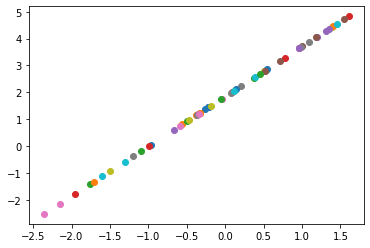

Degree 3


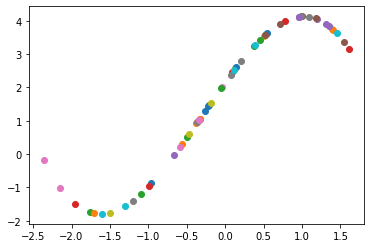

Degree 5


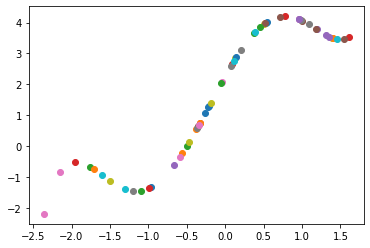

Degree 7


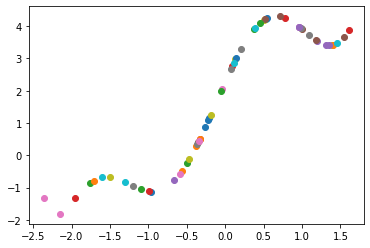

Degree 10


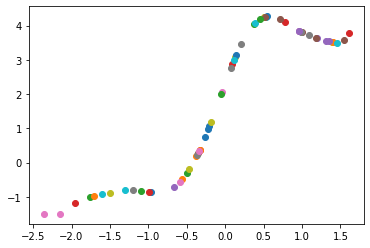

Degree 18


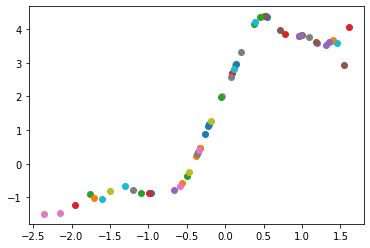

In [70]:
for i in range(len(prm)):
    XtrP = prm[i][0]
    lr = prm[i][2]
    
    print("Degree", d[i])
    for j in range(XtrP.shape[0]):
        plt.plot(XtrP[j,0], lr.theta[0][0] + np.sum([lr.theta[0][1:]] * XtrP[j]), 'o')

    plt.show()

### b.

In [71]:
errTrain = []
errTest = []

for i in range(len(prm)):
    XtrP = prm[i][0]
    XteP = prm[i][3]
    lr = prm[i][2]
    
    y_hat_tr = []
    
    for j in range(XtrP.shape[0]):
        y_hat_tr.append(lr.theta[0][0] + np.sum([lr.theta[0][1:]] * XtrP[j]))
    
    y_hat_tr = np.array(y_hat_tr)
    
    y_hat_te = []
    for j in range(XteP.shape[0]):
        y_hat_te.append(lr.theta[0][0] + np.sum([lr.theta[0][1:]] * XteP[j]))
   
    y_hat_te = np.array(y_hat_te)
    
    errTraini = np.mean((Ytr - y_hat_tr)**2)
    errTesti = np.mean((Yte - y_hat_te)**2)
    
    errTrain.append(errTraini)
    errTest.append(errTesti)

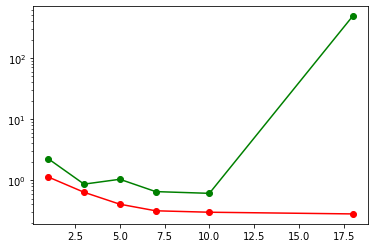

In [73]:
d = np.array(d)
errTrain = np.array(errTrain)
errTest = np.array(errTest)
plt.semilogy(d, errTrain,'r', d, errTest,'g')
plt.semilogy(d, errTrain,'ro', d, errTest,'go')

### c.

I recommend polynomial of degree 10 as it is the lowest error rate that the test data error achieves where the training data error is also low before the test data error exponentially increases.

# Problem 2: Cross-validation

In [68]:
nFolds = 5
J = []
for iFold in range(nFolds):
    Xti, Xvi, Yti, Yvi = ml.crossValidate(Xtr, Ytr, nFolds, iFold) 
    learner = ml.linear.linearRegress( Xti, Yti ) 
    J.append(np.mean((Yvi - (learner.theta[0][0] + learner.theta[0][1]*Xvi))**2)) 
J = np.array(J)
np.mean(J)

7.786471875820261

## 1. 

In [ ]:
error_per_fxn = []

# prm[i][0] = Xtrp
# prm[i][1] = params
# prm[i][2] = lr
# prm[i][3] = Xtep
# prm[i][4] = _
# where d[i] is the degree of the polynomial

J = []

for i in range(len(prm)):
    nFolds = 5
    J2 = []
    for iFold in range(nFolds):
        Xti, Xvi, Yti, Yvi = ml.crossValidate(prm[i][0], Ytr, nFolds, iFold)           
        learner = ml.linear.linearRegress( Xti, Yti )  
        y_hat = []
        for k in range(Xti.shape[0]):
            y_hat.append(learner.theta[0][0] + np.sum([learner.theta[0][1:]] * Xti[k]))
        y_hat = np.array(y_hat)
        
        J2.append(np.mean((Yti - y_hat)**2))
    J2 = np.array(J2)
    J.append(np.mean(J2))

J = np.array(J)

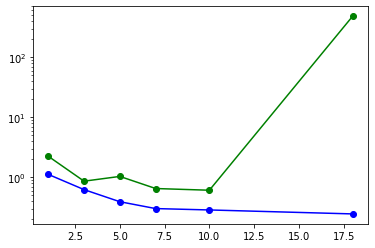

In [35]:
plt.semilogy(d,J,'b', d, errTest, 'g')
plt.semilogy(d,J,'ob', d, errTest, 'og')

## 2.

The MSE estimates from five-fold cross-validation continue to decrease (inversely) exponentially nearing 0 after polynomial degree of 10 while clearly the MSE estimates from the actual test data in problem one still increase exponentially after a polynomial degree of 10.

## 3.

For the sake of not having an overly complex model requiring more work, a polynomial degree of 7 or even 10 -- but I'm choosing 7. The MSE at degree polynomial degree 7 for the five-fold cross-validation is already considerably low.

## 4.

In [62]:
nFolds = [2,3,4,5,6,10,12,15]
# index 3 for prm

nJ = []

for i in nFolds:
    nJ2 = []
    for iFold in range(i):
        Xti, Xvi, Yti, Yvi = ml.crossValidate(prm[3][0], Ytr, i, iFold)            # use ith block as validation
        learner = ml.linear.linearRegress( Xti, Yti )                                   # train on Xti, Yti, the data for this fold
        y_hat = []
        for k in range(Xti.shape[0]):
            y_hat.append(learner.theta[0][0] + np.sum([learner.theta[0][1:]] * Xti[k]))   # now compute the MSE on Xvi, Yvi and save it
        y_hat = np.array(y_hat)
        
        nJ2.append(np.mean((Yti - y_hat)**2))
    nJ2 = np.array(nJ2)
    nJ.append(np.mean(nJ2))

nJ = np.array(nJ)
nFolds = np.array(nFolds)

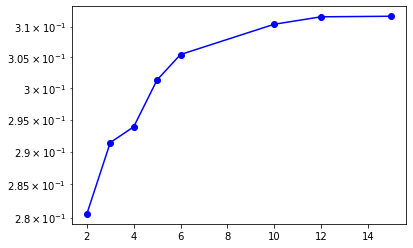

In [66]:
plt.semilogy(nFolds, nJ, 'b')
plt.semilogy(nFolds, nJ, 'ob')

As the number of folds increases, the error of the cross-validation increases logarithmically. This is probably because as more folds are implemented, smaller groups of available data are used as validation data, thus increasing the MSE of those models across the board. The logarithmic shape could be explained because as the number of validation data become smaller and smaller, the average of the individual squared errors per fold make a slightly larger impact, but less and less so with each succession. 